In [28]:
import torch
import torch.nn as nn

from torch.utils.data import TensorDataset, DataLoader

In [81]:
from sklearn.datasets import (
    make_friedman2,
    make_friedman3,
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
import matplotlib.pyplot as plt

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [102]:
X, y = make_friedman2(
    n_samples=10000,
    random_state=42,
    noise=0.10
)

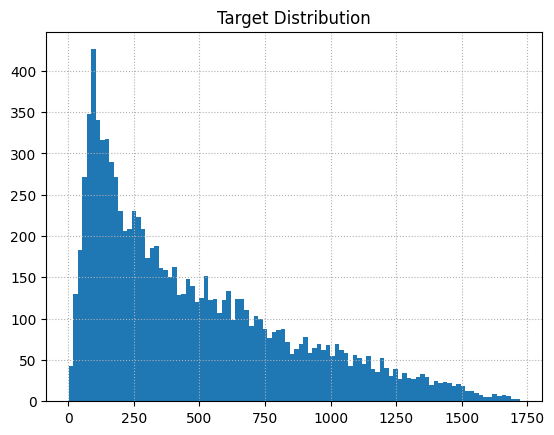

In [103]:
plt.hist(y, bins=100)
plt.grid(True, linestyle=':')
plt.title('Target Distribution');

In [104]:
# As features ja estão normalizadas
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [106]:
X_train, X_eval, y_train, y_eval = train_test_split(
    X_train,
    y_train,
    test_size=0.15,
    random_state=42
)

In [107]:
train_dataset = TensorDataset(X_train, y_train)
eval_dataset = TensorDataset(X_eval, y_eval)
test_dataset = TensorDataset(X_test, y_test)

In [108]:
train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=1024, shuffle=True)
test_dataloader = DataLoader(test_dataset)

In [109]:
X.shape

torch.Size([10000, 4])

In [127]:
class ModelMakeFriedman2(nn.Module):
    def __init__(self):
        super(ModelMakeFriedman2, self).__init__()
        self.input_layer = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Dropout(p=0.15)
        )
        self.hidden_layer = nn.Sequential(
            nn.BatchNorm1d(8),
            nn.Linear(8, 16),
            nn.Dropout(p=0.15),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.Dropout(p=0.15),
            nn.ReLU()
        )
        self.output_layer = nn.Sequential(
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        return x

In [128]:
model = ModelMakeFriedman2().to(device)

In [145]:
optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-1)
criterion = torch.nn.MSELoss()

In [146]:
EPOCHS = 500
loss_history = []

TODO: faça as funções de treino e validação salve os resultados e plote faça um for para ver qual optmizer ele performou melhor

In [147]:
optimizer.zero_grad(set_to_none=True)
for epoch in range(EPOCHS):
    epoch_loss = 0.0  # Inicializa a loss para a época atual

    for features, labels in train_dataloader:
        # zera os gradientes:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # predict do modelo:
        outputs = model(features)
        
        # calcula a loss:
        loss = criterion(outputs.view(-1), labels)
        
        # backpropagation
        loss.backward()
        
        # updates weights and biases
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    loss_history.append(epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Época [{epoch + 1}/{EPOCHS}] - Loss: {epoch_loss:.4f}')

Época [10/500] - Loss: 16591.0647
Época [20/500] - Loss: 15870.2559
Época [30/500] - Loss: 15317.8440
Época [40/500] - Loss: 15223.1508
Época [50/500] - Loss: 14894.7061
Época [60/500] - Loss: 14598.2451
Época [70/500] - Loss: 14170.2782
Época [80/500] - Loss: 14093.8025
Época [90/500] - Loss: 13777.3557
Época [100/500] - Loss: 13512.9251
Época [110/500] - Loss: 13252.9745
Época [120/500] - Loss: 13071.2898
Época [130/500] - Loss: 12844.4357
Época [140/500] - Loss: 12630.8580
Época [150/500] - Loss: 12457.8705
Época [160/500] - Loss: 12251.4851
Época [170/500] - Loss: 12019.2584
Época [180/500] - Loss: 11788.5052
Época [190/500] - Loss: 11598.0979
Época [200/500] - Loss: 11478.5304
Época [210/500] - Loss: 11151.2697
Época [220/500] - Loss: 10983.6161
Época [230/500] - Loss: 10807.1299
Época [240/500] - Loss: 10679.6104
Época [250/500] - Loss: 10406.7186
Época [260/500] - Loss: 10304.1782
Época [270/500] - Loss: 10009.9660
Época [280/500] - Loss: 9937.9641
Época [290/500] - Loss: 9767.0

In [148]:
y_pred = []
y_true = []

with torch.no_grad():
    model.eval()
    for features, labels in test_dataloader:
        # remove a dimensão adicional
        features, labels = features.to(device), labels.to(device)
        predict = model(features)
        y_pred.append(predict.item())
        y_true.append(labels.item())

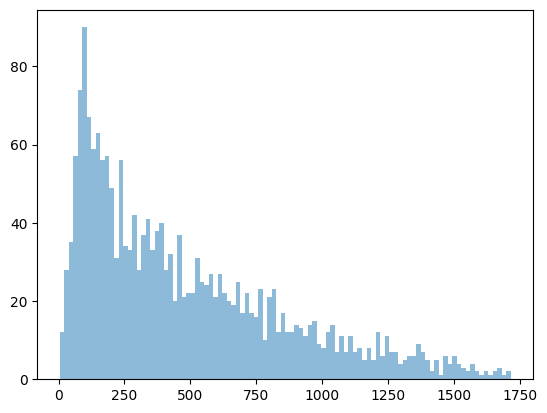

In [149]:
# plt.hist(y_pred, bins=100)
plt.hist(y_true, bins=100, alpha=0.5);

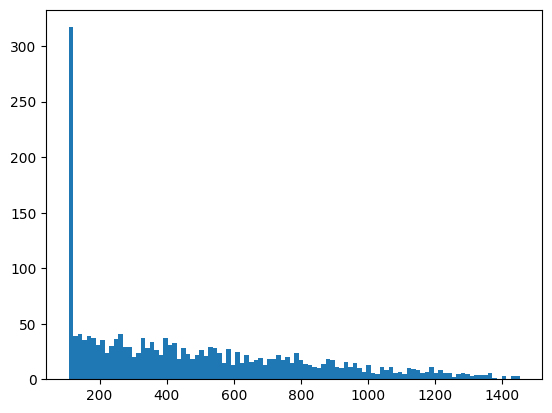

In [150]:
plt.hist(y_pred, bins=100);

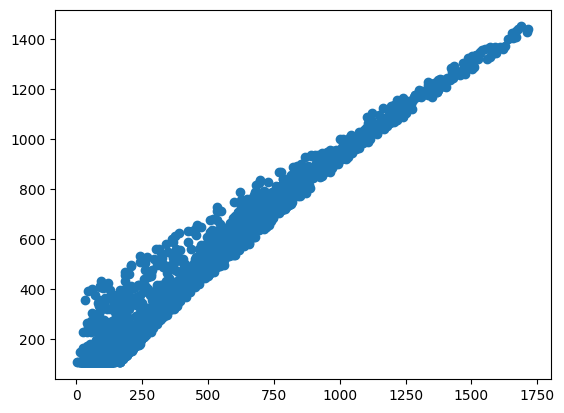

In [151]:
plt.scatter(y_true, y_pred)

In [152]:
mean_absolute_error(y_true, y_pred)

59.90412098813057

In [153]:
mean_squared_error(y_true, y_pred)

7121.179543715991

In [154]:
mean_squared_error(y_true, y_pred, squared=False)

84.38708161629948

In [157]:
y_pred[:10]

[255.74517822265625,
 605.3705444335938,
 107.94940948486328,
 427.2879943847656,
 318.7711486816406,
 467.5482177734375,
 119.54950714111328,
 682.1578369140625,
 259.9638366699219,
 155.3458251953125]

In [158]:
y_true[:10]

[181.30332946777344,
 532.113525390625,
 98.46039581298828,
 460.51531982421875,
 344.1501770019531,
 470.00506591796875,
 115.02189636230469,
 658.4423828125,
 264.4324645996094,
 139.67349243164062]

In [12]:
X, y = make_friedman3(
    n_samples=10000,
    random_state=42,
    noise=0.10
)

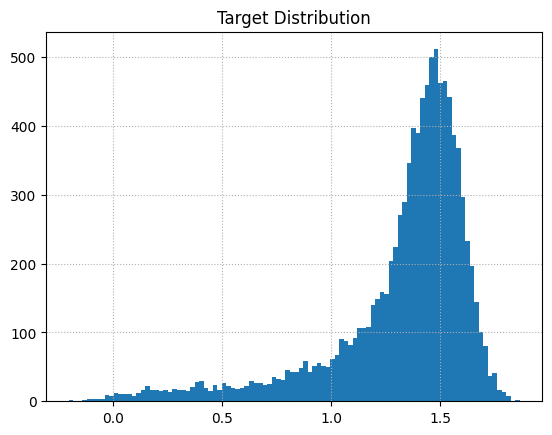

In [13]:
plt.hist(y, bins=100)
plt.grid(True, linestyle=':')
plt.title('Target Distribution');